In [15]:
# Ricardo Garcia, FSRI 2021
import numpy as np
import tensorflow.keras.datasets.mnist as dataa
import matplotlib.pyplot as plt

In [2]:
# Import the data and normalize it. This is the only time that tensorflow is used
(train_images, train_labels), (test_images,test_labels) = dataa.load_data()
train_images = np.reshape(train_images, (60000, 784)) / 255
test_images = np.reshape(test_images, (10000, 784)) / 255

In [3]:
def s(vector):
    """
        Draws a picture of a given handwritten digit.
        vector (numpy 784-dimensional vector) => the handwritten digit to be drawn. It is a vector of pixel values
    """
    plt.matshow(vector.reshape(28,28),cmap='gray')
    plt.show()

In [4]:
# Activation function and its derivative
def tanh(x):
    return 1 / (1 + np.exp(-x))
def dtanh(x):
    return np.exp(-x)/np.power(1+np.exp(-x),2)

In [5]:
# One layer neural network.
class NN:
    def __init__(self, i_d, o_d, learning_rate):
        """
            Initializes the neural nerwork with random weights and biases.
            i_d (int) => the dimension of the input data
            o_d (int) => the dimension of the output label
            learning_rate (float) => the learning rate
        """
        self.weights = np.random.rand(o_d, i_d) - 0.5
        self.bias = np.random.rand(o_d, 1)
        self.i = np.random.rand(i_d, 1)
        self.o = np.random.rand(o_d, 1)
        self.i_d = i_d
        self.o_d = o_d
        self.L = learning_rate
        self.wrong_indices = []
        
    def feed_forward(self, d):
        """
            For a given input d, returns the network's prediction.
            Sets the network's self.o attribute to the prediction before
            the activation function is applied. This is important in the
            gradients calculation.
        """
        self.i = np.reshape(d, (self.i_d, 1))
        self.o = np.matmul(self.weights, self.i) + self.bias
        return tanh(self.o)
    
    def weight_gradients(self, out, cost):
        w = np.matmul((out - cost) * dtanh(self.o), self.i.transpose())
        return w
    
    def bias_gradients(self, out, cost):
        b = (out - cost) * dtanh(self.o)
        return b
    
    def train(self, data, labels, batch_size):
        """
            Trains the neural network.
            data (numpy 2-D array) => a two dimensional array containing all  training data.
            One dimension is the size of a single training example (for mnist it would be 784)
            The other dimension is the total number of training examples (for mnist it would be 60000)
            
            labels (numpy 1-D array) => an array containing the labels (for mnist it is 10 long)
        """
        w_g = np.zeros((self.o_d, self.i_d))
        b_g = np.zeros((self.o_d, 1))
        
        for i in range(len(data)):
            f = self.feed_forward(data[i])
            c = np.zeros((10, 1))
            c[labels[i]] = 1
            w_g = w_g + self.weight_gradients(f, c)
            b_g = b_g + self.bias_gradients(f, c)
            if i % batch_size == 0:
                w_g /= batch_size
                b_g /= batch_size
                self.weights -= w_g * self.L
                self.bias -= b_g * self.L
                
                w_g = np.zeros((self.o_d, self.i_d))
                b_g = np.zeros((self.o_d, 1))
                
    def label(self, test):
        """
            Prints the label for a given test example to the console
            test (numpy 1-D array) => the test example
        """
        results = self.feed_forward(test)
        print("Output Layer Activations:")
        for i in range(len(results)):
            print("Confidence its " + str(i) + ":", results[i])
        mx = -10
        index = -1
        for i in range(len(results)):
            if results[i] > mx:
                mx = results[i]
                index = i 
        s(test)
        print("its a ", index, " with ", mx, "confidence")
        
    def error(self, test,label):
        """
            Prints the output layer's activations to the console,
            along with the corresponding label vector, and the magnitude 
            of the error. Mostly used for debugging
            test (numpy 1-D array) => the test example
            label (int) => what number should the test be labeled as
        """
        results = self.feed_forward(test)
        l = np.zeros((10, 1))
        l[label] = 1
        vectorOut = results - l
        
        print("Output Layer Activations:")
        for i in range(len(results)):
            print("Confidence its " + str(i) + ":", results[i])
        print(l)
        mx = -10
        index = -1
        for i in range(len(results)):
            if results[i] > mx:
                mx = results[i]
                index = i
        s(test)
        print(np.dot(vectorOut[0], vectorOut[0]))

    def calculate_accuracy(self,test,labels):
        """
            Returns the number of examples the network correctly labeled
            divided by the total number of examples. Also saves the cases it got
            wrong as an array in the self.wrong_indices field.
            test (numpy 2-D array) => a two dimensional array containing all testing data.
            labels (numpy 1-D array) => array containing all testing labels as ints.
        """
        self.wrong_indices = []
        right = 0
        total = 0
        for i, s in enumerate(test): 
            results = self.feed_forward(s)
            if np.argmax(results) == labels[i]:
                right += 1
            else:
                self.wrong_indices.append(i)
            total += 1
        return (right / total) * 100

In [6]:
neural_net=NN(784,10,1)
# Training might take a few seconds. If it takes more than
# a minute something is up
for i in range(10):
    neural_net.train(train_images,train_labels,10)

In [7]:
neural_net.calculate_accuracy(test_images,test_labels)

91.49000000000001

Output Layer Activations:
Confidence its 0: [1.02175892e-06]
Confidence its 1: [3.16169657e-13]
Confidence its 2: [0.00251208]
Confidence its 3: [3.59184784e-13]
Confidence its 4: [3.63362638e-07]
Confidence its 5: [3.17444889e-06]
Confidence its 6: [8.53667313e-06]
Confidence its 7: [2.72895822e-05]
Confidence its 8: [0.02574628]
Confidence its 9: [7.25322215e-06]


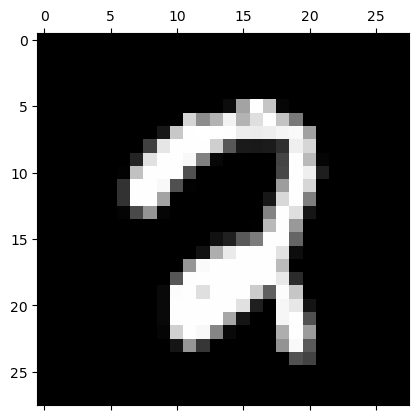

its a  8  with  [0.02574628] confidence


In [8]:
# neural_net.wrong_indices has all of the examples it got
# wrong. Change the number to see other examples
neural_net.label(test_images[neural_net.wrong_indices[4]])

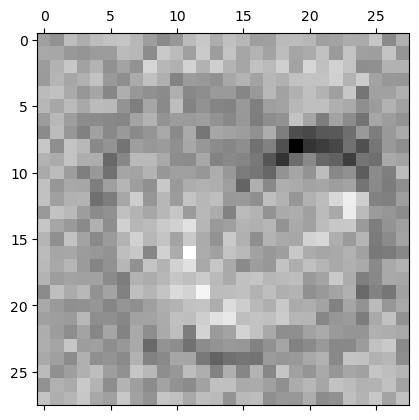

In [9]:
# Visualizing the weights is fun
s(neural_net.weights[6])

In [10]:
# All of the following examples were drawn by me in a program I made.
# Neural network doesn't seem too robust when handling adversarial examples,
# For example, it is 92% sure that the cat is a 2.

Output Layer Activations:
Confidence its 0: [6.42296132e-12]
Confidence its 1: [3.64524294e-14]
Confidence its 2: [0.1834065]
Confidence its 3: [2.06055144e-09]
Confidence its 4: [4.51358432e-10]
Confidence its 5: [7.54566551e-09]
Confidence its 6: [1.34723662e-11]
Confidence its 7: [2.34143415e-14]
Confidence its 8: [2.64043786e-14]
Confidence its 9: [6.51552285e-12]


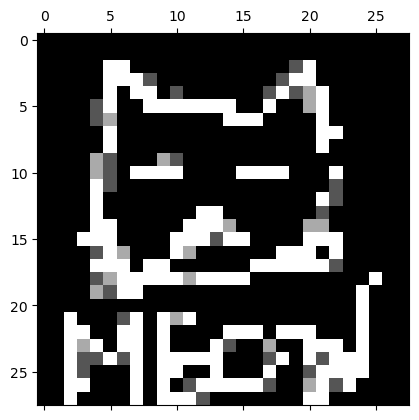

its a  2  with  [0.1834065] confidence


In [11]:
cat=np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.8999999999999999,0,0,0,0,0,0,0.8999999999999999,0.6,0.3,0.3,0.8999999999999999,0],[0,0,0,0,0,0.3,0.3,0,0,0.6,0.6,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.3,0.8999999999999999,0.3,0.6,0,0,0,0.8999999999999999,0.3,0,0,0],[0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.6,0.8999999999999999,0.8999999999999999,0.3,0.3,0.3,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.6,0.3,0,0,0,0,0.8999999999999999,0,0,0],[0,0,0.8999999999999999,0.8999999999999999,0,0,0,0,0,0,0,0,0,0,0,0,0.6,0.8999999999999999,0.8999999999999999,0.8999999999999999,0,0.3,0.8999999999999999,0.8999999999999999,0.3,0,0,0],[0,0,0,0.8999999999999999,0.8999999999999999,0,0,0,0,0,0.8999999999999999,0,0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999],[0,0,0,0.3,0.8999999999999999,0.8999999999999999,0,0,0,0,0.8999999999999999,0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0.8999999999999999,0,0,0,0.6,0.8999999999999999,0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999],[0,0,0,0,0.3,0.8999999999999999,0,0,0,0.3,0.8999999999999999,0,0,0,0,0.8999999999999999,0.8999999999999999,0,0.8999999999999999,0,0,0.6,0,0,0.8999999999999999,0.8999999999999999,0,0.8999999999999999],[0,0,0,0,0,0.8999999999999999,0,0,0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0.6,0,0.6,0,0,0.8999999999999999,0,0,0.8999999999999999,0,0.3,0.8999999999999999],[0,0,0,0,0,0.8999999999999999,0,0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0,0,0.8999999999999999,0,0,0,0,0,0.8999999999999999,0,0.8999999999999999,0.3],[0,0,0,0,0,0.8999999999999999,0,0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0.3,0,0,0.8999999999999999,0,0,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0],[0,0,0,0,0,0.8999999999999999,0.8999999999999999,0,0,0,0,0,0,0,0.6,0.8999999999999999,0,0,0.8999999999999999,0,0,0,0.8999999999999999,0.3,0,0,0.8999999999999999,0],[0,0,0,0,0,0,0.8999999999999999,0,0,0,0.8999999999999999,0,0,0,0,0.8999999999999999,0,0,0.8999999999999999,0,0,0,0.8999999999999999,0,0,0,0.8999999999999999,0],[0,0,0,0,0,0,0.8999999999999999,0,0,0,0.8999999999999999,0,0,0,0,0,0,0.8999999999999999,0,0,0,0,0.8999999999999999,0,0,0,0.8999999999999999,0],[0,0,0,0,0.3,0.8999999999999999,0,0,0,0,0.8999999999999999,0,0,0,0,0,0,0.8999999999999999,0,0,0,0,0,0.6,0.3,0.8999999999999999,0.3,0],[0,0,0,0.3,0.8999999999999999,0,0,0,0,0,0.8999999999999999,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0,0,0,0,0.8999999999999999,0,0.8999999999999999,0,0,0],[0,0,0.3,0.8999999999999999,0.3,0,0,0,0,0,0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0,0,0,0,0.8999999999999999,0,0,0,0,0],[0,0,0.8999999999999999,0.8999999999999999,0.6,0.6,0,0,0,0,0,0,0,0,0.6,0.8999999999999999,0.8999999999999999,0.8999999999999999,0,0,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.3,0.6,0.8999999999999999],[0,0,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0,0,0,0.8999999999999999,0.3,0.6,0.8999999999999999,0,0.8999999999999999,0,0,0,0,0,0.8999999999999999,0.3,0.8999999999999999,0.8999999999999999,0.8999999999999999],[0,0,0,0,0,0,0,0.8999999999999999,0,0,0.8999999999999999,0.3,0.3,0,0,0.8999999999999999,0.8999999999999999,0.3,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.3,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.8999999999999999,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]).transpose()
neural_net.label(cat)

Output Layer Activations:
Confidence its 0: [0.00010603]
Confidence its 1: [2.05627409e-05]
Confidence its 2: [0.07385534]
Confidence its 3: [0.06876686]
Confidence its 4: [0.24993199]
Confidence its 5: [0.00029549]
Confidence its 6: [2.46737987e-07]
Confidence its 7: [2.97617444e-06]
Confidence its 8: [7.06969839e-06]
Confidence its 9: [1.11684656e-08]


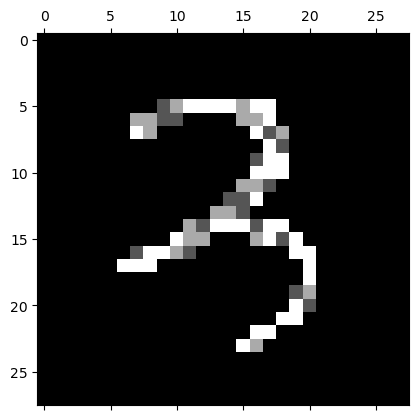

its a  4  with  [0.24993199] confidence


In [12]:
# Neural network is bad at labeling examples drawn with
# very thin lines. I suspect that the confidence doesnt
# depend a lot on the actual shape of the drawing but more
# on the number of bright pixels.
three=np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.8999999999999999,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0.6,0.8999999999999999,0,0,0,0,0,0,0,0,0.3,0.8999999999999999,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0.6,0.6,0,0,0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0.3,0.3,0,0,0,0,0,0,0,0,0,0.8999999999999999,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0.6,0.3,0,0,0,0,0,0,0,0,0.8999999999999999,0.6,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0.8999999999999999,0,0,0,0,0,0,0,0,0.6,0.6,0.3,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0.8999999999999999,0,0,0,0,0,0,0,0,0.3,0.6,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0.8999999999999999,0,0,0,0,0,0,0,0.6,0.8999999999999999,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0.8999999999999999,0,0,0,0,0,0,0.3,0.6,0.8999999999999999,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0.6,0.6,0,0,0,0,0.6,0.3,0.3,0.8999999999999999,0,0,0,0,0,0,0,0,0.8999999999999999,0,0,0,0],[0,0,0,0,0,0.8999999999999999,0.6,0.8999999999999999,0,0.3,0.8999999999999999,0.6,0.8999999999999999,0,0.3,0.6,0,0,0,0,0,0,0.8999999999999999,0.6,0,0,0,0],[0,0,0,0,0,0.8999999999999999,0.8999999999999999,0.3,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.3,0,0,0.8999999999999999,0.8999999999999999,0,0,0,0,0,0,0.8999999999999999,0,0,0,0,0],[0,0,0,0,0,0,0,0.6,0.3,0.8999999999999999,0.8999999999999999,0,0,0,0.8999999999999999,0.3,0,0,0,0,0,0.8999999999999999,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0,0,0.3,0.8999999999999999,0.8999999999999999,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.6,0.3,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]).transpose()
neural_net.label(three)

Output Layer Activations:
Confidence its 0: [0.0005491]
Confidence its 1: [1.13835171e-05]
Confidence its 2: [0.00399277]
Confidence its 3: [0.00011691]
Confidence its 4: [7.46868727e-06]
Confidence its 5: [0.75032112]
Confidence its 6: [0.00908758]
Confidence its 7: [8.79650087e-08]
Confidence its 8: [0.00226691]
Confidence its 9: [3.65259873e-06]


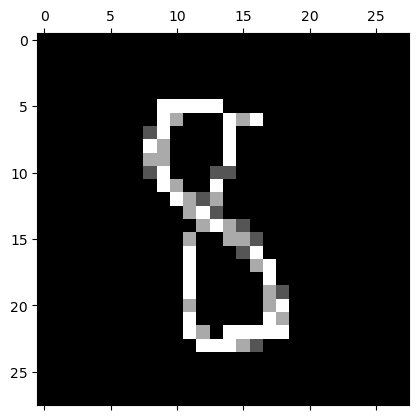

its a  5  with  [0.75032112] confidence


In [13]:
eight=np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0.3,0.8999999999999999,0.6,0.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.6,0.6,0.8999999999999999,0.8999999999999999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0.8999999999999999,0.6,0,0,0,0,0.6,0.8999999999999999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0.8999999999999999,0,0,0,0,0,0,0.6,0.6,0,0.6,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.6,0.8999999999999999,0.8999999999999999,0,0,0,0,0],[0,0,0,0,0,0.8999999999999999,0,0,0,0,0,0,0.3,0.8999999999999999,0.6,0,0,0,0,0,0,0,0.6,0.8999999999999999,0,0,0,0],[0,0,0,0,0,0.8999999999999999,0,0,0,0,0.3,0.8999999999999999,0.6,0.3,0.8999999999999999,0,0,0,0,0,0,0,0,0.8999999999999999,0,0,0,0],[0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.3,0,0,0,0.6,0.6,0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0,0,0,0],[0,0,0,0,0,0,0.6,0,0,0,0,0,0,0,0.3,0.6,0.3,0,0,0,0,0,0.8999999999999999,0.6,0,0,0,0],[0,0,0,0,0,0,0.8999999999999999,0,0,0,0,0,0,0,0,0.3,0.8999999999999999,0.6,0,0,0,0,0.8999999999999999,0.3,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0.6,0.6,0.8999999999999999,0.8999999999999999,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.3,0.8999999999999999,0.6,0.8999999999999999,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]] ).transpose()
neural_net.label(eight)

Output Layer Activations:
Confidence its 0: [9.31017636e-13]
Confidence its 1: [3.87565326e-11]
Confidence its 2: [2.00244225e-08]
Confidence its 3: [0.99984611]
Confidence its 4: [1.89671585e-06]
Confidence its 5: [3.18439173e-07]
Confidence its 6: [3.09254823e-10]
Confidence its 7: [2.08182668e-09]
Confidence its 8: [3.91902522e-06]
Confidence its 9: [4.54426273e-07]


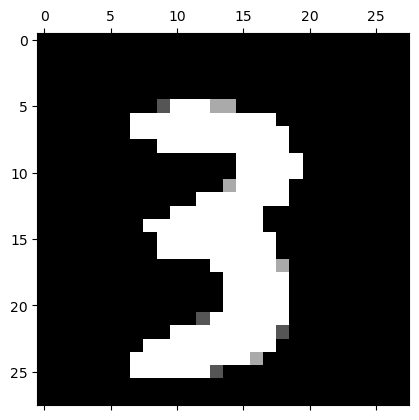

its a  3  with  [0.99984611] confidence


In [14]:
# More bright pixels => More confidence
thick_three=np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0,0],[0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0,0,0,0,0,0,0.8999999999999999,0,0,0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0,0],[0,0,0,0,0,0.3,0.8999999999999999,0.8999999999999999,0.8999999999999999,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0,0],[0,0,0,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0,0,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0,0],[0,0,0,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0,0,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0,0],[0,0,0,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0,0,0,0,0.3,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0,0],[0,0,0,0,0,0.6,0.8999999999999999,0.8999999999999999,0.8999999999999999,0,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.3,0,0],[0,0,0,0,0,0.6,0.8999999999999999,0.8999999999999999,0.8999999999999999,0,0,0.6,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0,0,0],[0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0,0,0],[0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.6,0,0,0],[0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0,0,0,0],[0,0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0,0,0,0,0.6,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.3,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]).transpose()
neural_net.label(thick_three)